# Other relevant plots


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns
import random

#### First, plot of how the metrics change over time for each performance group


C:\Users\nicol\AppData\Local\Temp\ipykernel_54896\3520274127.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right')


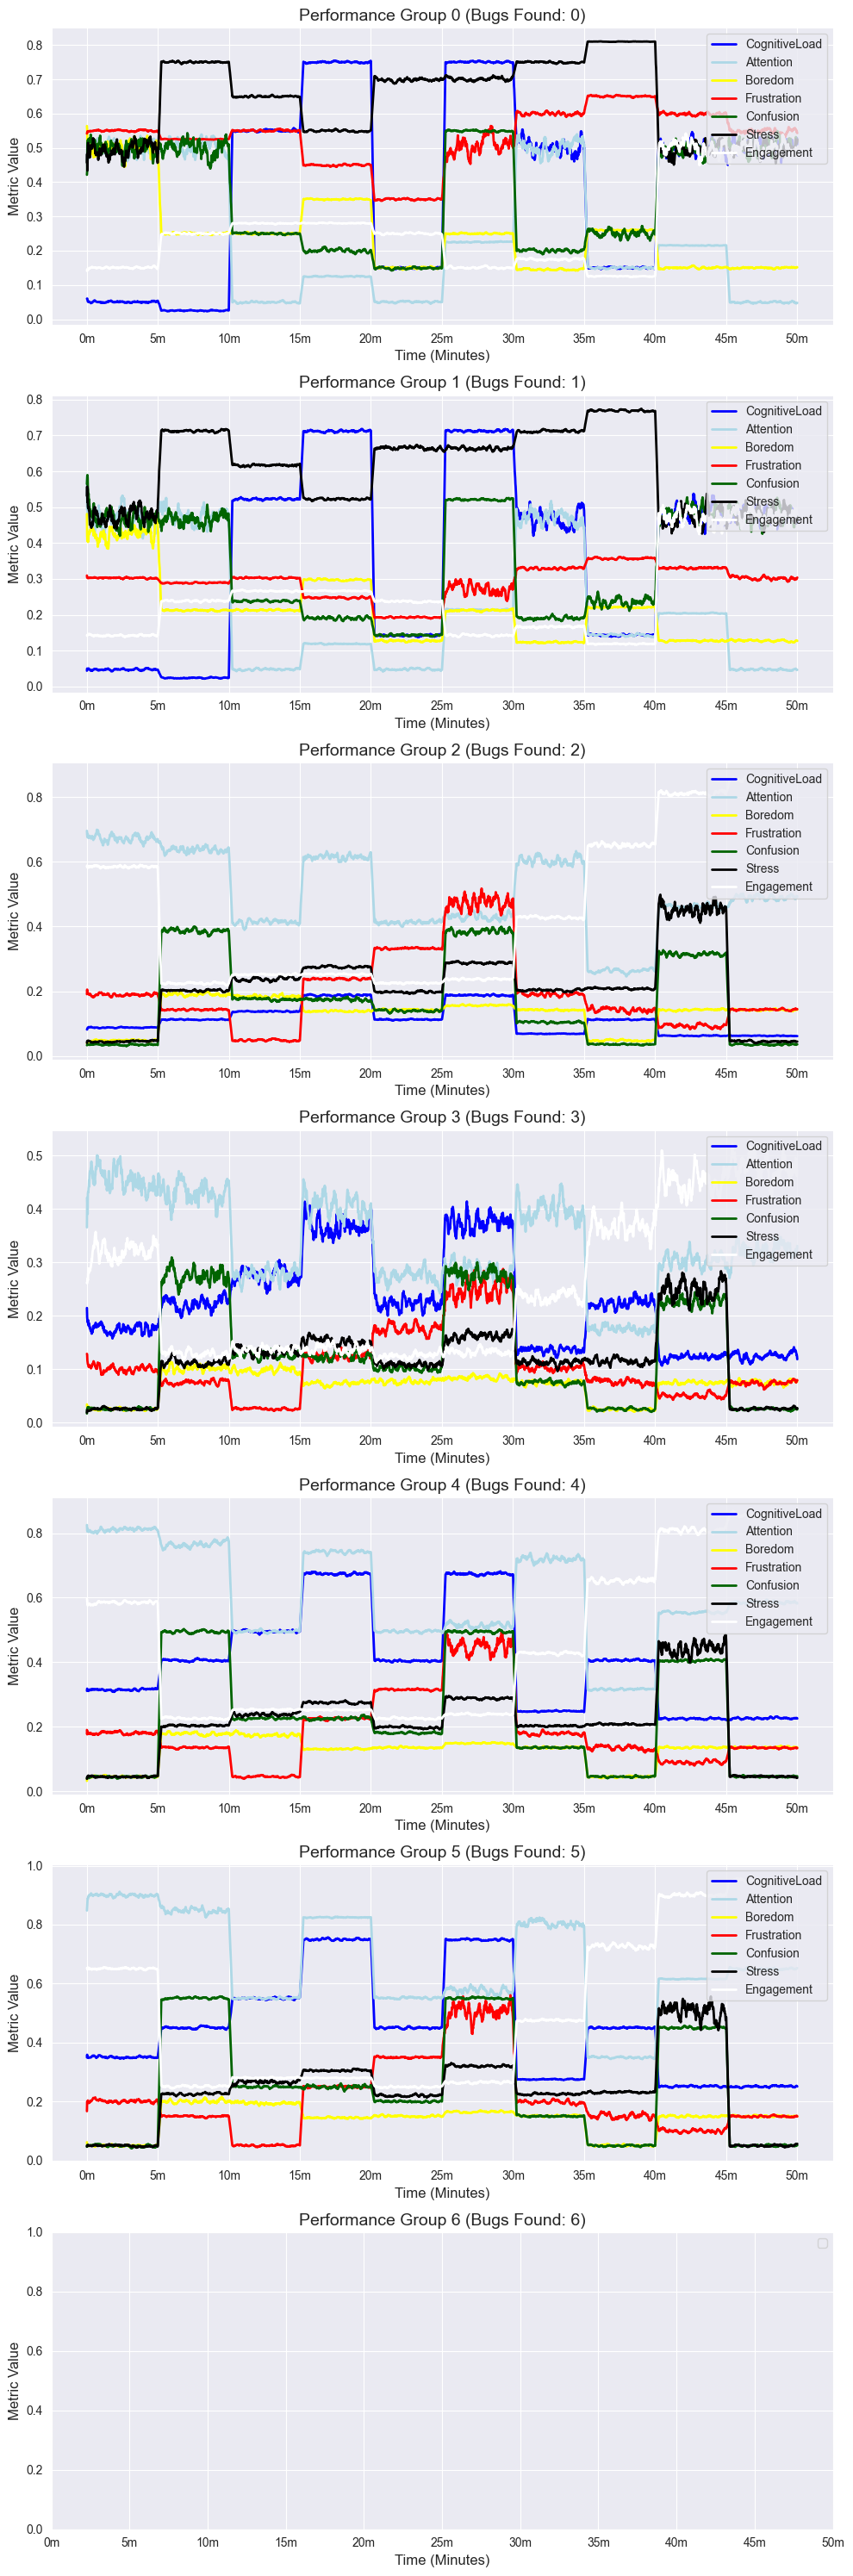

In [2]:
# Load the dataset
file_path = 'combined_dataset.csv'
df = pd.read_csv(file_path)

# Define the list of metrics
metrics = ['CognitiveLoad', 'Attention', 'Boredom', 'Frustration', 'Confusion', 'Stress', 'Engagement']

# Set the window size for smoothing
window_size = 15

# Prepare a dictionary to hold the averages for each performance group
grouped_averages = {}

# Loop through each performance level from 0 to 6
for performance in range(7):
    # Filter data for this performance group
    performance_group = df[df['Performance'] == performance]
    
    # Compute the average of each metric for each second
    averages_over_time = performance_group.groupby('Time')[metrics].mean()
    
    # Apply a rolling window to smooth the data
    smoothed_averages = averages_over_time.rolling(window=window_size, min_periods=1).mean()
    
    # Store the result in the dictionary
    grouped_averages[performance] = smoothed_averages


color_palette = ['#0000FF', '#ADD8E6', '#FFFF00', '#FF0000', '#006400', '#000000', '#FFFFFF']

# Set up a grid of subplots for the 7 performance groups
fig, axes = plt.subplots(7, 1, figsize=(10, 30))
x_ticks = list(range(0, 3001, 300))  # Time from 0 to 3000, every 300 seconds


# Plot each group's averages over time
for performance, ax in zip(grouped_averages.keys(), axes):
    for metric, color in zip(metrics, color_palette):
        sns.lineplot(x=grouped_averages[performance].index, y=grouped_averages[performance][metric], 
                     ax=ax, label=metric, color=color, linewidth=2)
    
    ax.set_title(f'Performance Group {performance} (Bugs Found: {performance})', fontsize=14)
    ax.set_ylabel('Metric Value', fontsize=12)
    ax.legend(loc='upper right')
    
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([f'{int(t/60)}m' for t in x_ticks])  # Convert seconds to minutes
    ax.set_xlabel('Time (Minutes)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


#### Second, plot of how each metric change over time for different performance groups in the same plot

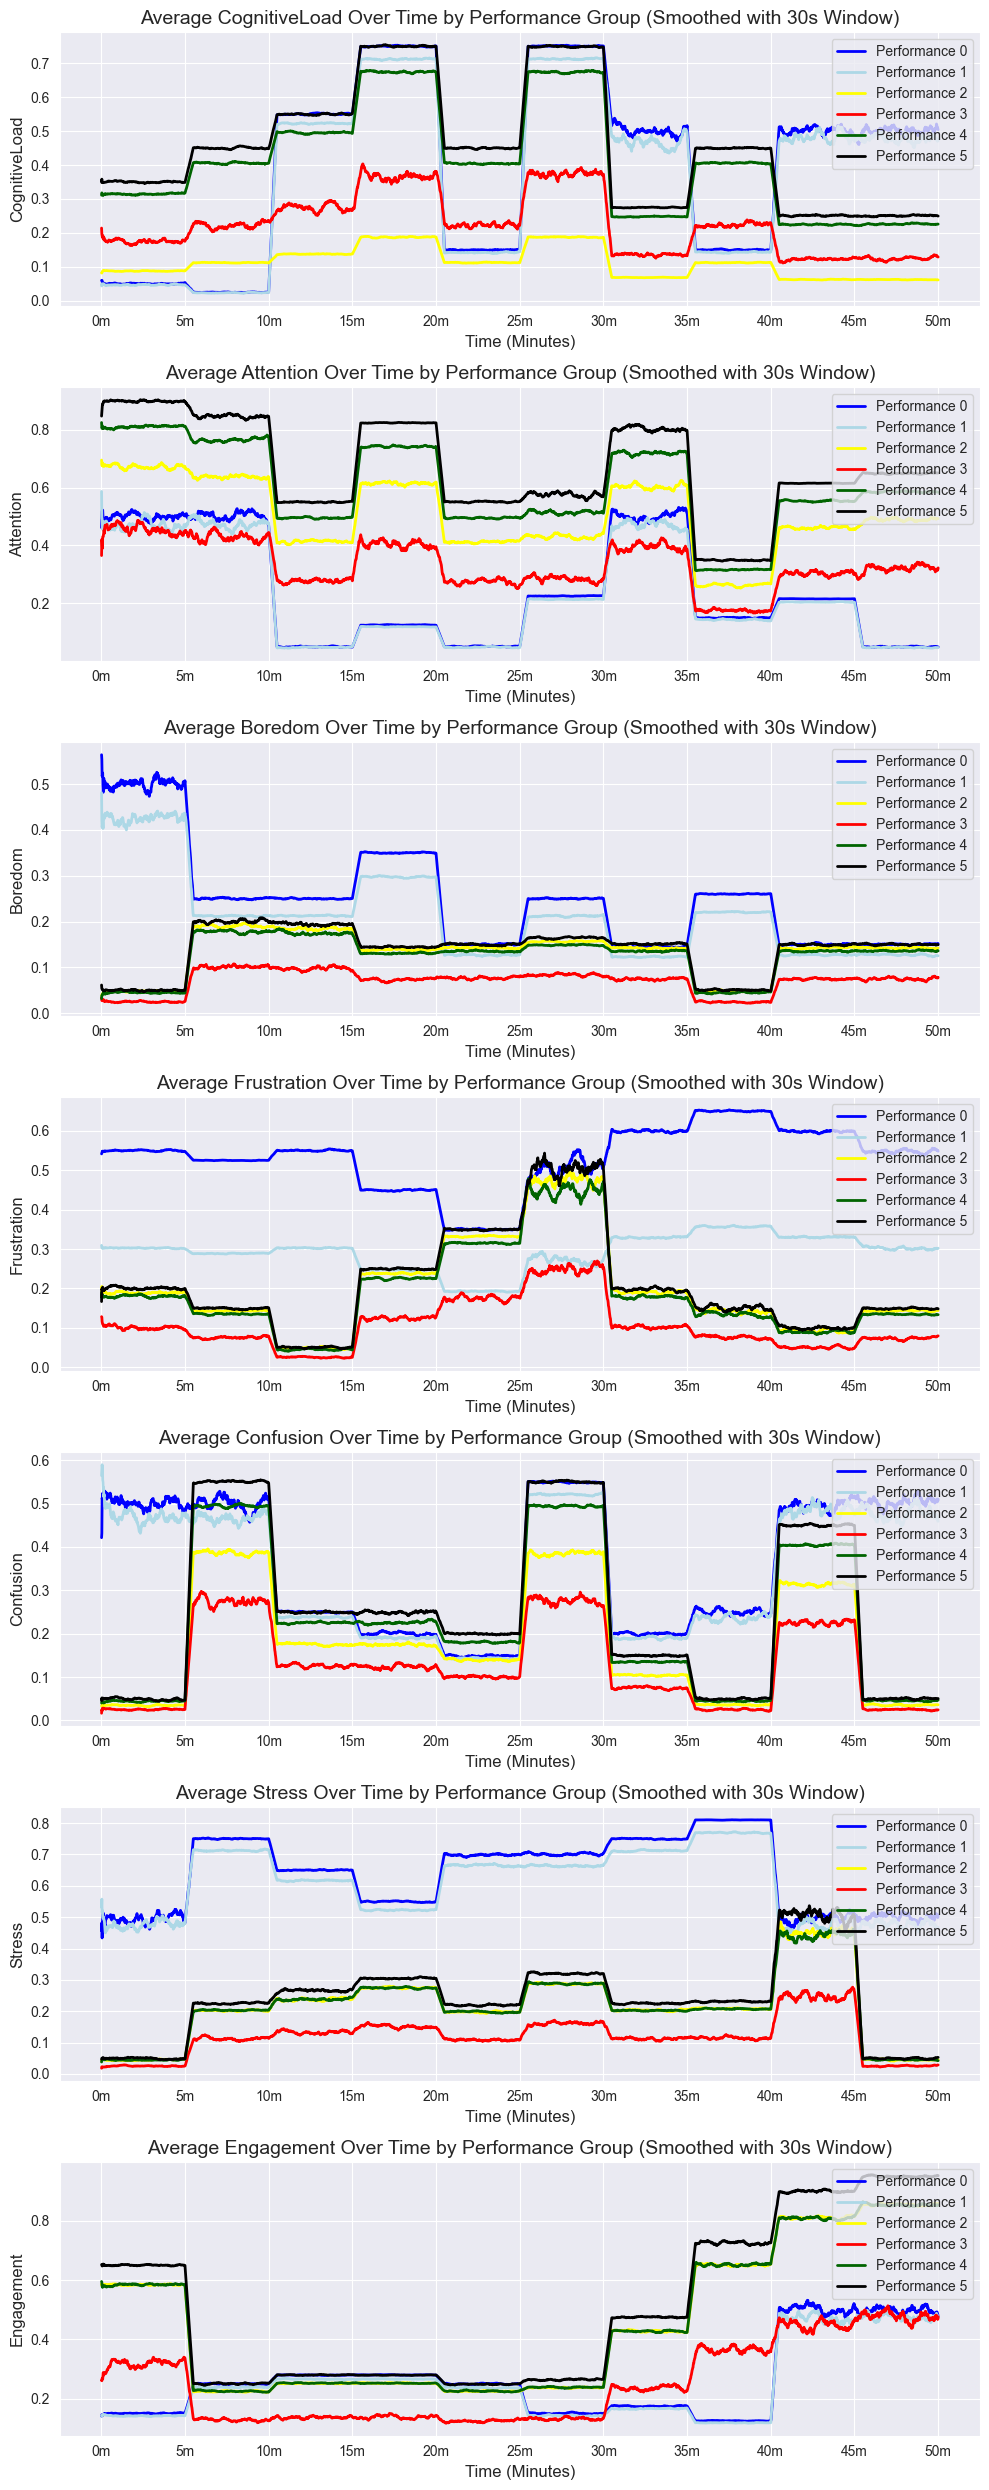

In [3]:

# Group data by 'Performance' and calculate the average for each second
metrics = ['CognitiveLoad', 'Attention', 'Boredom', 'Frustration', 'Confusion', 'Stress', 'Engagement']

# Set the window size for smoothing
window_size = 30

# Prepare a dictionary to hold the averages for each performance group
grouped_averages = {}

# Loop through each performance level from 0 to 6
for performance in range(7):
    # Filter data for this performance group
    performance_group = df[df['Performance'] == performance]
    
    # Compute the average of each metric for each second
    averages_over_time = performance_group.groupby('Time')[metrics].mean()
    
    # Apply a rolling window to smooth the data
    smoothed_averages = averages_over_time.rolling(window=window_size, min_periods=1).mean()
    
    # Store the result in the dictionary
    grouped_averages[performance] = smoothed_averages

# Plot the results using custom color palette
custom_palette = ['#0000FF', '#ADD8E6', '#FFFF00', '#FF0000', '#006400', '#000000', '#FFFFFF']

# Set up a figure for each metric
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 25))

# Set the ticks for the x-axis to display every 300 seconds
x_ticks = list(range(0, 3001, 300))  # Time from 0 to 3000, every 300 seconds

# Plot each metric across performance groups
for metric, ax in zip(metrics, axes):
    for performance, color in zip(grouped_averages.keys(), custom_palette):
        sns.lineplot(x=grouped_averages[performance].index, y=grouped_averages[performance][metric], 
                     ax=ax, label=f'Performance {performance}', color=color, linewidth=2)
    
    ax.set_title(f'Average {metric} Over Time by Performance Group (Smoothed with {window_size}s Window)', fontsize=14)
    ax.set_ylabel(metric, fontsize=12)
    ax.legend(loc='upper right')
    
    # Set x-axis ticks to show time every 300 seconds for every plot
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([f'{int(t/60)}m' for t in x_ticks])  # Convert seconds to minutes
    ax.set_xlabel('Time (Minutes)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()



### Third, plot of how each metric change over time for a random student in each performance group

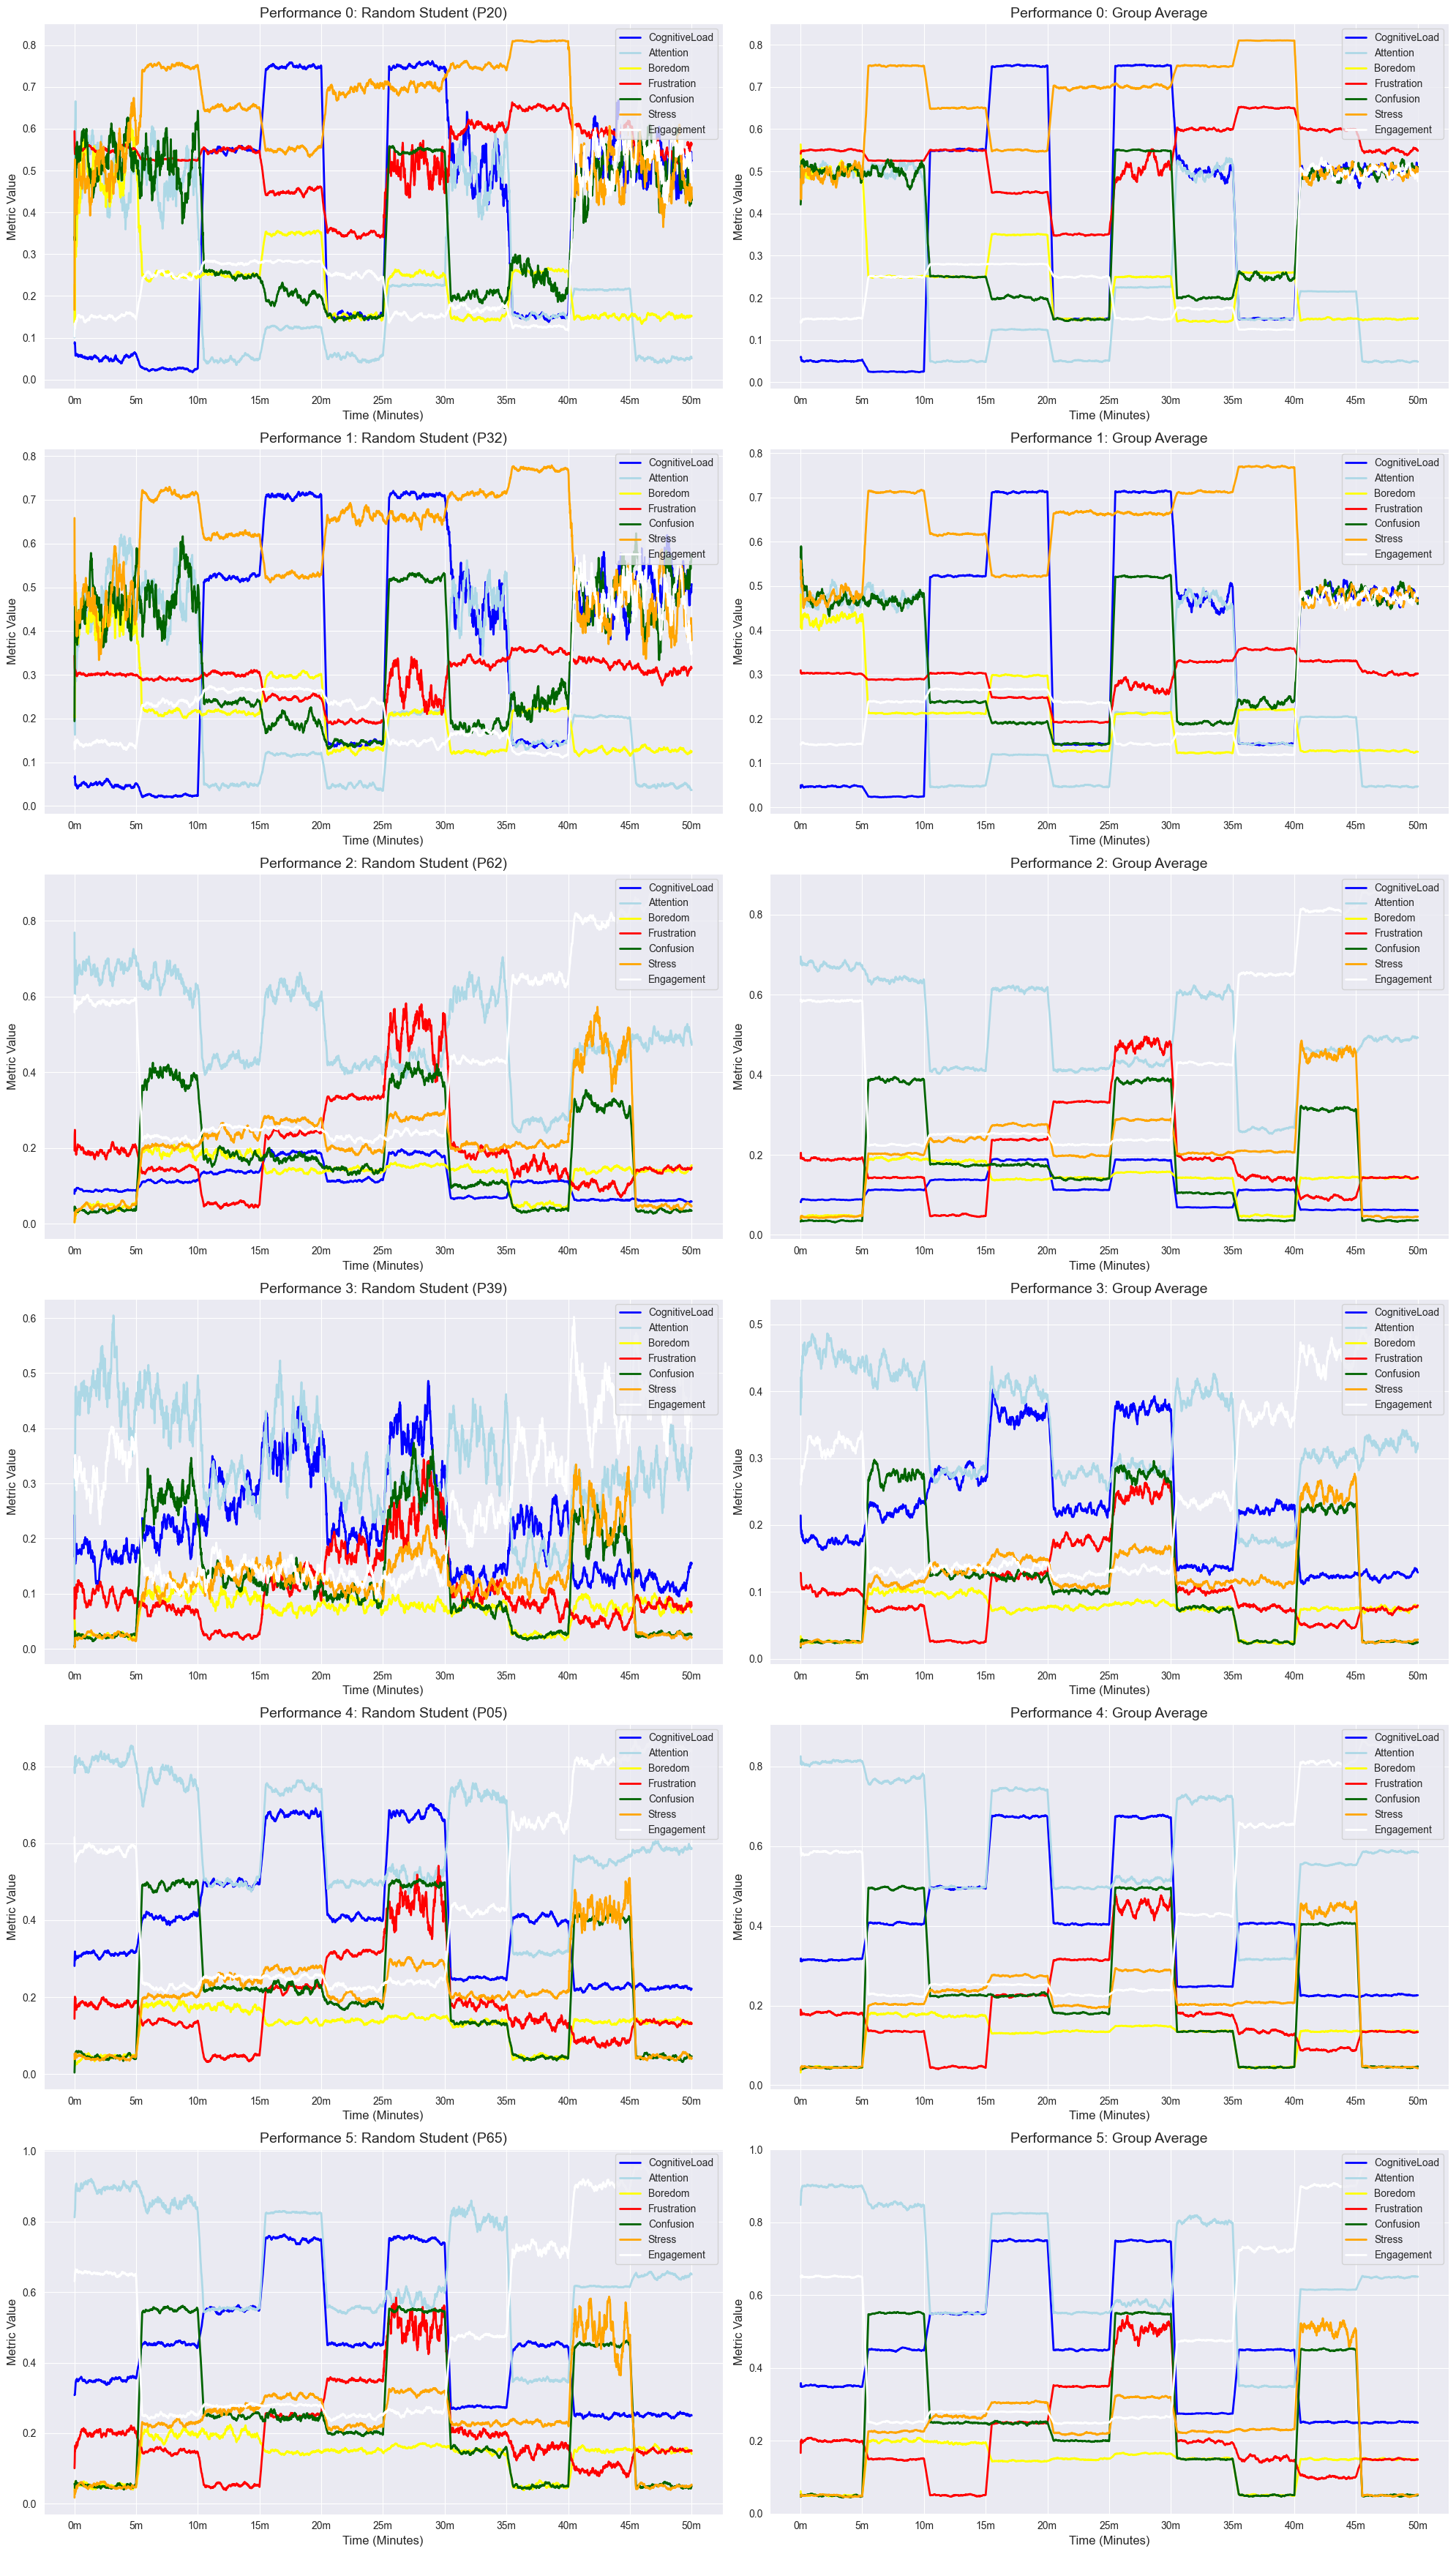

In [4]:

# Set up metrics and performance range
metrics = ['CognitiveLoad', 'Attention', 'Boredom', 'Frustration', 'Confusion', 'Stress', 'Engagement']
performance_levels = range(6)

# Color palette for metrics
custom_palette = ['#0000FF', '#ADD8E6', '#FFFF00', '#FF0000', '#006400', '#FFA500', '#FFFFFF']

# Set the window size for smoothing
window_size = 30

# Step 3: Create a 6-row layout with 2 plots per row, since Performance=6 is never recorded
fig, axes = plt.subplots(6, 2, figsize=(20, 35))  # 7 rows, 2 columns (one for random student, one for group average)

# Set the ticks for the x-axis to display every 300 seconds
x_ticks = list(range(0, 3001, 300))  # Time from 0 to 3000, every 300 seconds

for performance, ax_row in zip(performance_levels, axes):
    # Filter data for this performance group
    performance_group = df[df['Performance'] == performance]
    
    ### Plot 1: Random Student ###
    random_student = random.choice(performance_group['Source'].unique())  # Randomly pick one student
    student_data = performance_group[performance_group['Source'] == random_student]
    
    # Apply a rolling window to smooth the data for the random student
    smoothed_student_data = student_data.copy()
    smoothed_student_data[metrics] = student_data[metrics].rolling(window=window_size, min_periods=1).mean()
    
    # Plot each metric for the random student
    for metric, color in zip(metrics, custom_palette):
        sns.lineplot(x=smoothed_student_data['Time'], y=smoothed_student_data[metric], 
                     ax=ax_row[0], label=metric, color=color, linewidth=2)
    
    ax_row[0].set_title(f'Performance {performance}: Random Student ({random_student})', fontsize=14)
    ax_row[0].set_ylabel('Metric Value', fontsize=12)
    ax_row[0].legend(loc='upper right')
    ax_row[0].set_xticks(x_ticks)
    ax_row[0].set_xticklabels([f'{int(t/60)}m' for t in x_ticks])  # Convert seconds to minutes
    ax_row[0].set_xlabel('Time (Minutes)', fontsize=12)
    
    ### Plot 2: Group Average ###
    # Compute the average of each metric for the group and apply a rolling window
    group_averages = performance_group.groupby('Time')[metrics].mean()
    smoothed_group_averages = group_averages.rolling(window=window_size, min_periods=1).mean()
    
    # Plot the smoothed averages for the group
    for metric, color in zip(metrics, custom_palette):
        sns.lineplot(x=smoothed_group_averages.index, y=smoothed_group_averages[metric], 
                     ax=ax_row[1], label=metric, color=color, linewidth=2)
    
    ax_row[1].set_title(f'Performance {performance}: Group Average', fontsize=14)
    ax_row[1].set_ylabel('Metric Value', fontsize=12)
    ax_row[1].legend(loc='upper right')
    ax_row[1].set_xticks(x_ticks)
    ax_row[1].set_xticklabels([f'{int(t/60)}m' for t in x_ticks])  # Convert seconds to minutes
    ax_row[1].set_xlabel('Time (Minutes)', fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()


### Fourth, radar chart showing average metrics for each performance group

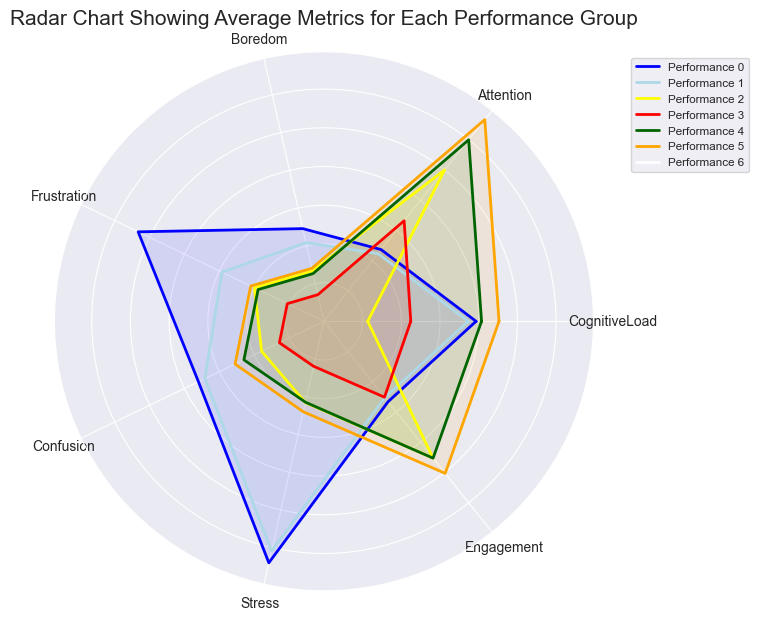

In [5]:

def plot_grouped_radar_charts(df):
    metrics = ['CognitiveLoad', 'Attention', 'Boredom', 'Frustration', 'Confusion', 'Stress', 'Engagement']
    N = len(metrics)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Set up the radar chart figure
    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
    
    # Assign colors for the performance groups (0 to 6) using a distinct color palette
    colors = ['blue', 'lightblue', 'yellow', 'red', 'darkgreen', 'orange', 'white']
    
    # Plot each performance group (0 to 6)
    for performance in range(7):
        group_data = df[df['Performance'] == performance][metrics].mean()
        values = group_data.values.flatten().tolist()
        values += values[:1]  # Closing the radar chart

        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Performance {performance}', color=colors[performance])
        ax.fill(angles, values, alpha=0.1, color=colors[performance])  # Light fill for clarity

    # Set the metric names around the plot
    ax.set_yticklabels([])  # Remove radial ticks
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    
    # Add a title
    plt.title('Radar Chart Showing Average Metrics for Each Performance Group', size=15)
    
    # Add a legend
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), fontsize='small')
    
    # Show the plot
    plt.show()

plot_grouped_radar_charts(df)


### Fifth, bar chart showing average values of metrics by performance group

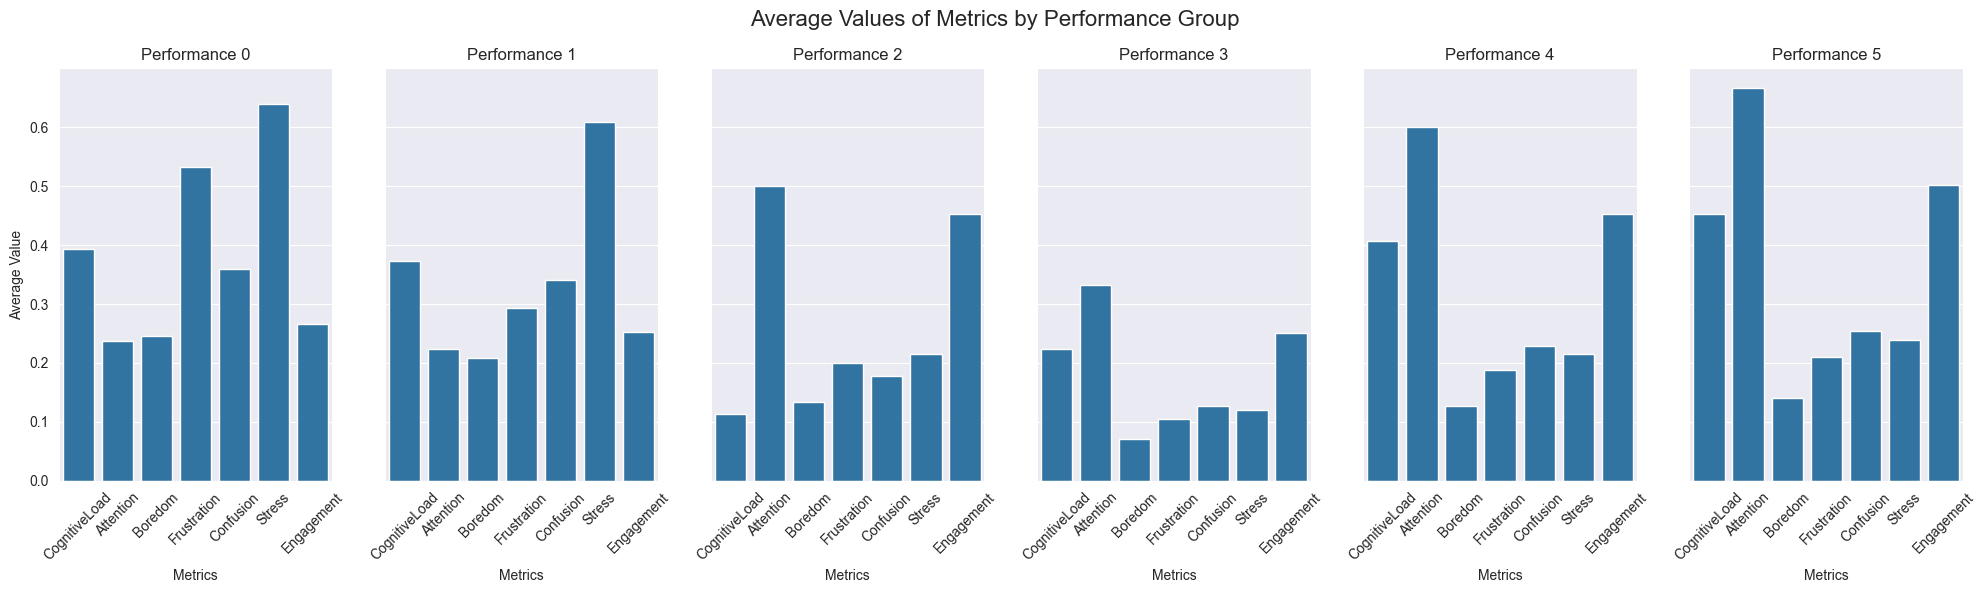

In [6]:

# Bar chart for average values of metrics by performance group
def plot_average_metrics_by_group(df):
    metrics = ['CognitiveLoad', 'Attention', 'Boredom', 'Frustration', 'Confusion', 'Stress', 'Engagement']
    performance_groups = df['Performance'].unique()
    
    # Set up figure for subplots
    fig, axes = plt.subplots(nrows=1, ncols=len(performance_groups), figsize=(20, 6), sharey=True)
    
    # Loop through each performance group and create a barplot for each
    for i, performance in enumerate(sorted(performance_groups)):
        avg_values = df[df['Performance'] == performance][metrics].mean()
        sns.barplot(ax=axes[i], x=avg_values.index, y=avg_values.values)
        axes[i].set_title(f'Performance {int(performance)}')
        axes[i].set_xlabel('Metrics')
        
        # Set tick positions before adding tick labels
        axes[i].set_xticks(range(len(metrics)))  # Set tick positions to match the number of metrics
        axes[i].set_xticklabels(avg_values.index, rotation=45)  # Add metric labels after ticks are set

        if i == 0:
            axes[i].set_ylabel('Average Value')
    
    plt.suptitle('Average Values of Metrics by Performance Group', size=16)
    plt.tight_layout()
    plt.show()

# Example call
plot_average_metrics_by_group(df)

